In [349]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [350]:
train = pd.read_csv('C:/Users/qqcom/Downloads/term_deposit_prediction/train.csv')
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [351]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [194]:
train.shape

(31647, 18)

In [195]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [196]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

## Categorical Features

In [197]:
train_obj = train.select_dtypes(include='object')

In [8]:
for col in train_obj.columns:
    print(col, end=': ')
    print(train_obj[col].unique())

job: ['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital: ['married' 'divorced' 'single']
education: ['unknown' 'secondary' 'tertiary' 'primary']
default: ['no' 'yes']
housing: ['no' 'yes']
loan: ['no' 'yes']
contact: ['telephone' 'cellular' 'unknown']
month: ['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
poutcome: ['unknown' 'success' 'failure' 'other']
subscribed: ['no' 'yes']


In [20]:
cg_features = [col for col in train_obj.columns if col not in ['subscribed']]
cg_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

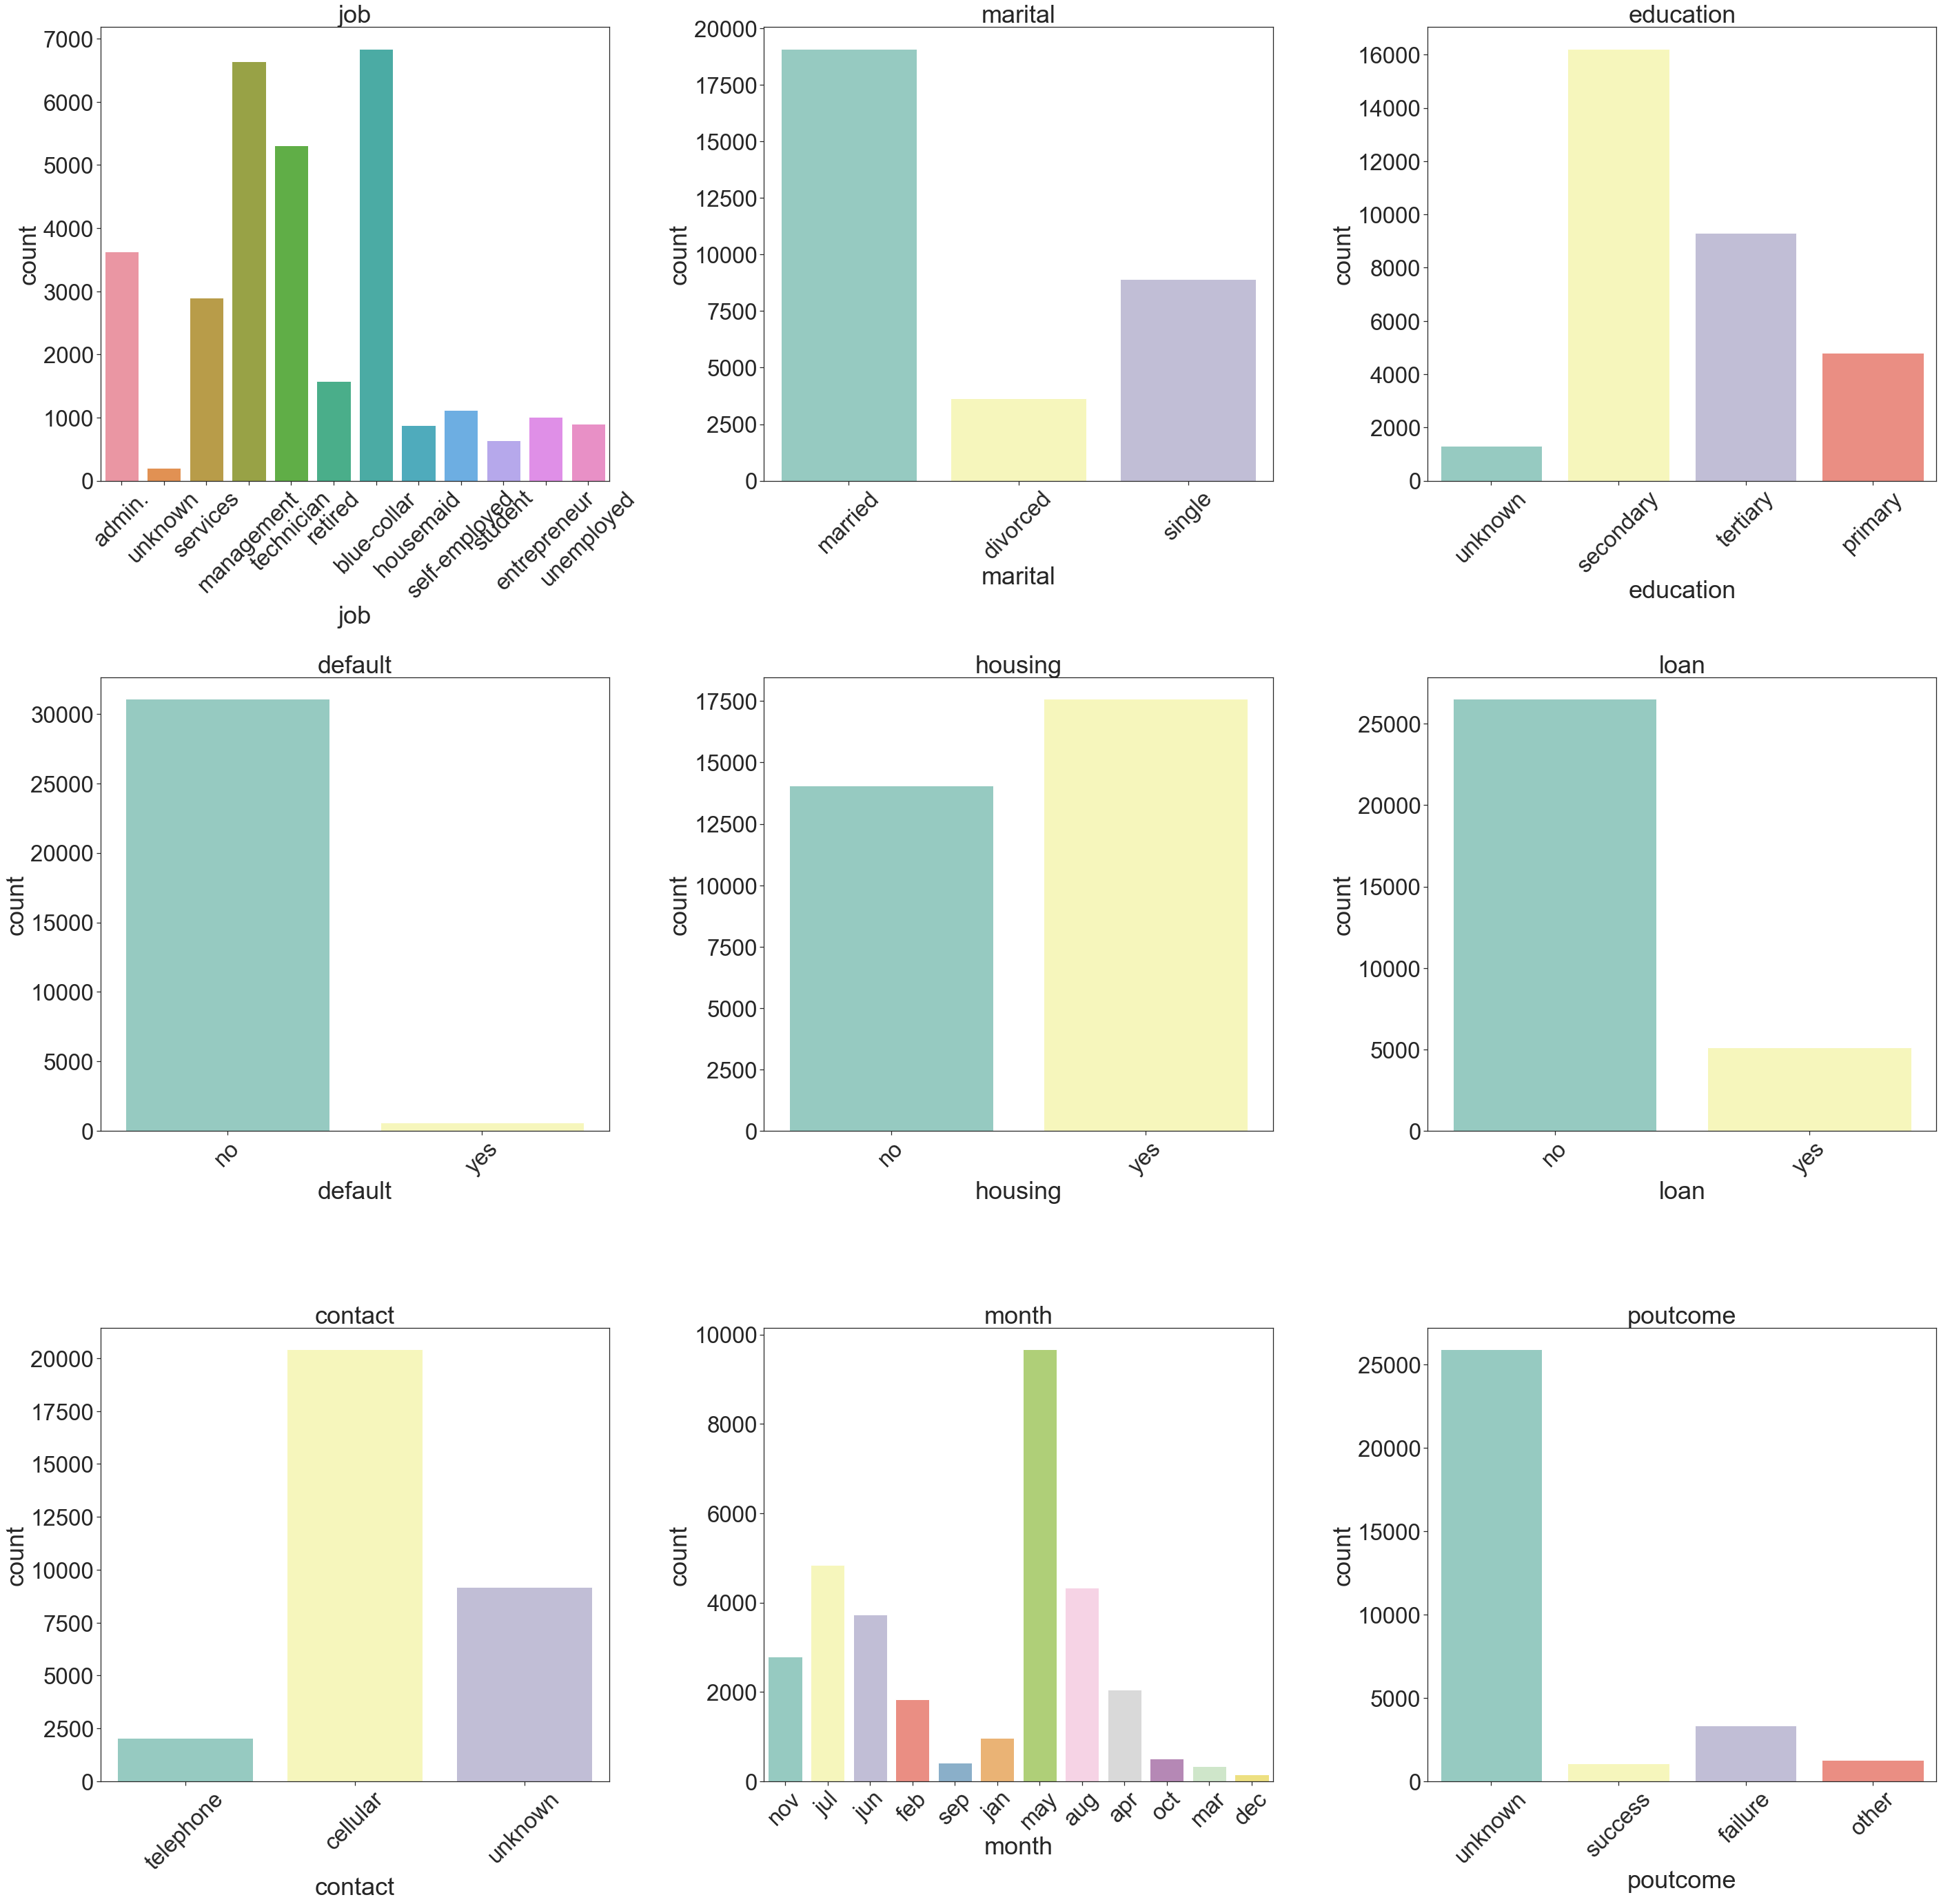

In [87]:
plt.figure(figsize=(40,50))
plotnum = 1
for cgf in cg_features:
    ax = plt.subplot(4,3,plotnum)
    sns.countplot(x=train_obj[cgf])
    sns.set(context='notebook', style='ticks', font_scale=3)
    plt.xticks(rotation=45)
    plt.xlabel(cgf)
    plt.title(cgf)
    sns.set_palette("Set3")
    plotnum += 1
plt.tight_layout()
plt.show()

### Relation with target feature

In [96]:
train_sub_yes = train_obj[train_obj['subscribed'] == 'yes']
train_sub_yes

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
3,management,divorced,tertiary,no,no,no,cellular,jun,success,yes
6,retired,married,secondary,no,no,no,telephone,jul,unknown,yes
10,services,divorced,secondary,yes,no,yes,cellular,jul,unknown,yes
18,blue-collar,married,primary,no,yes,no,cellular,may,unknown,yes
23,management,married,tertiary,no,yes,no,cellular,jul,unknown,yes
...,...,...,...,...,...,...,...,...,...,...
31611,management,divorced,tertiary,no,yes,no,cellular,apr,unknown,yes
31622,retired,divorced,primary,no,no,no,telephone,jul,success,yes
31632,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,yes
31643,management,divorced,tertiary,no,no,yes,cellular,jun,unknown,yes


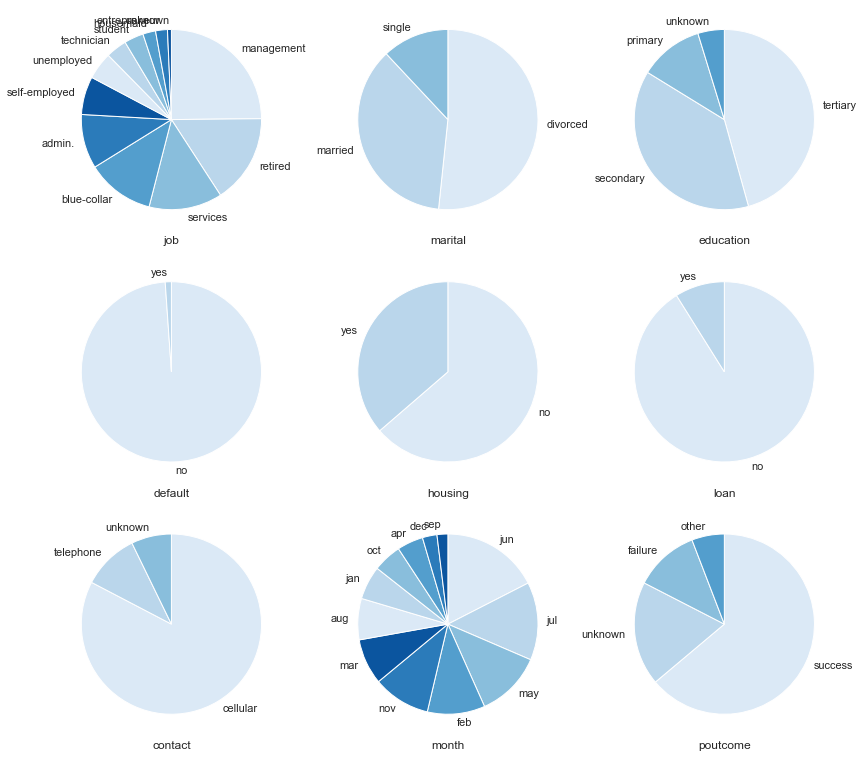

In [162]:
plt.figure(figsize=(12,14))
plotnum = 1
for feature in cg_features:
    ax = plt.subplot(4,3,plotnum)
    plt.pie(train_sub_yes[feature].value_counts(), labels =train_sub_yes[feature].unique(),
            startangle = 90,counterclock = False )
    sns.set_palette("Blues")
    plt.xlabel(feature)
    plotnum += 1
plt.tight_layout()

<Figure size 1440x1440 with 0 Axes>

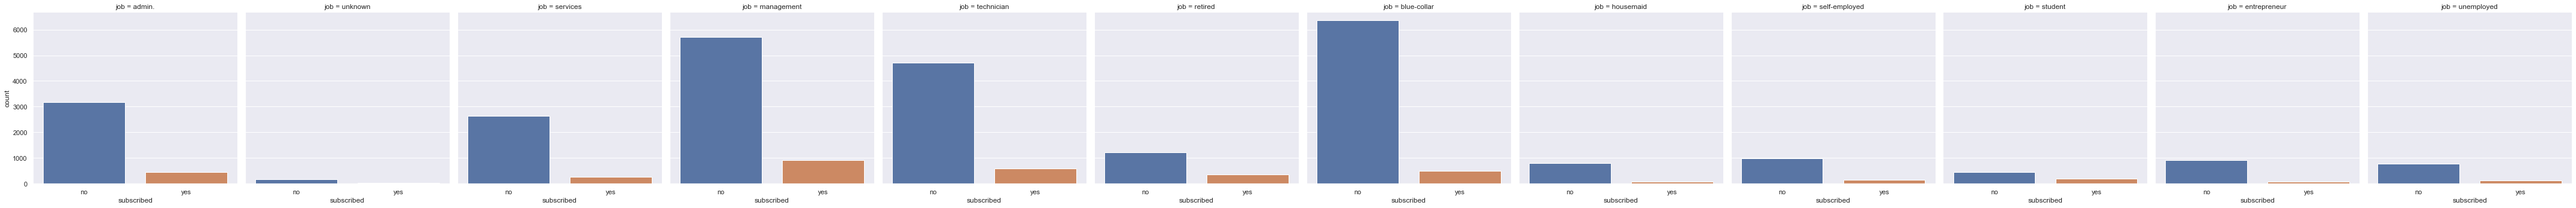

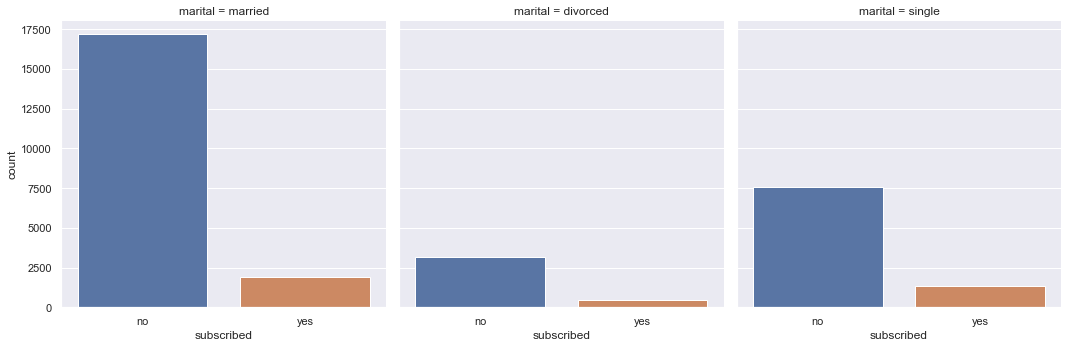

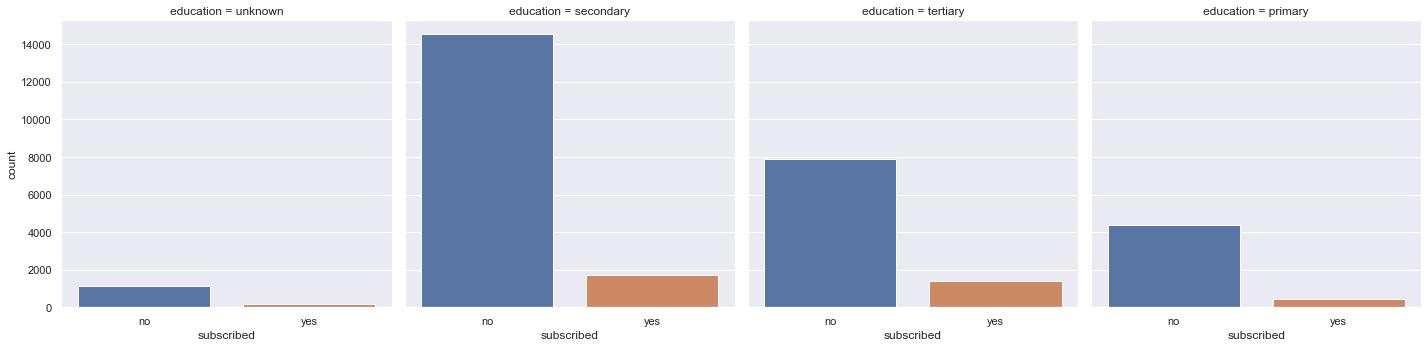

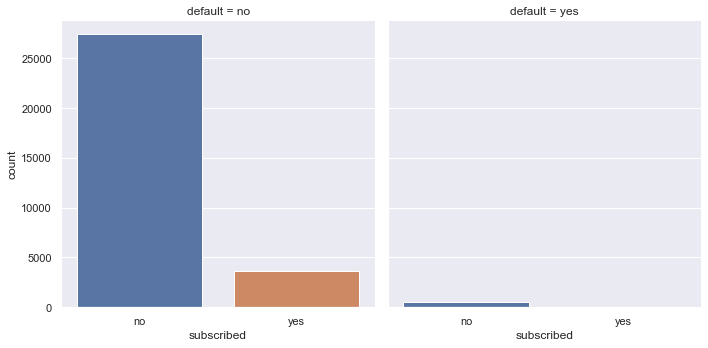

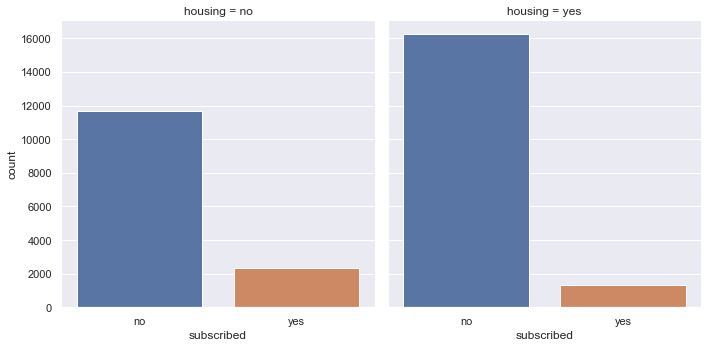

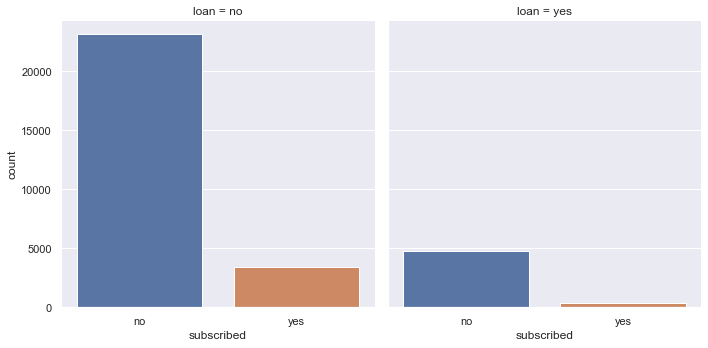

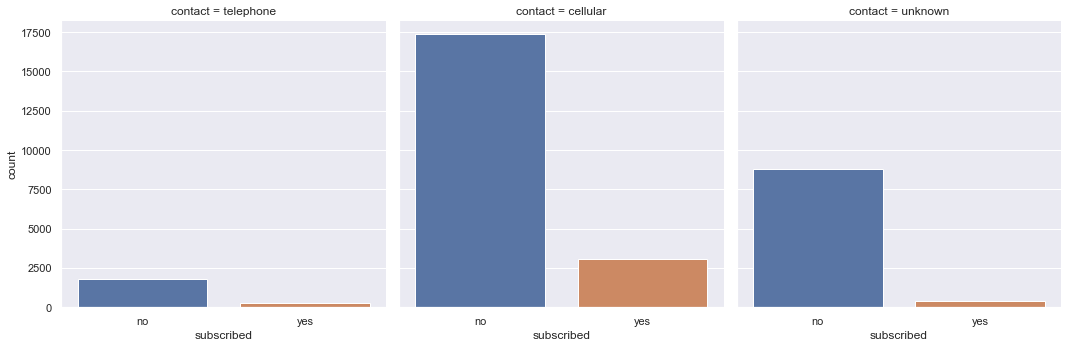

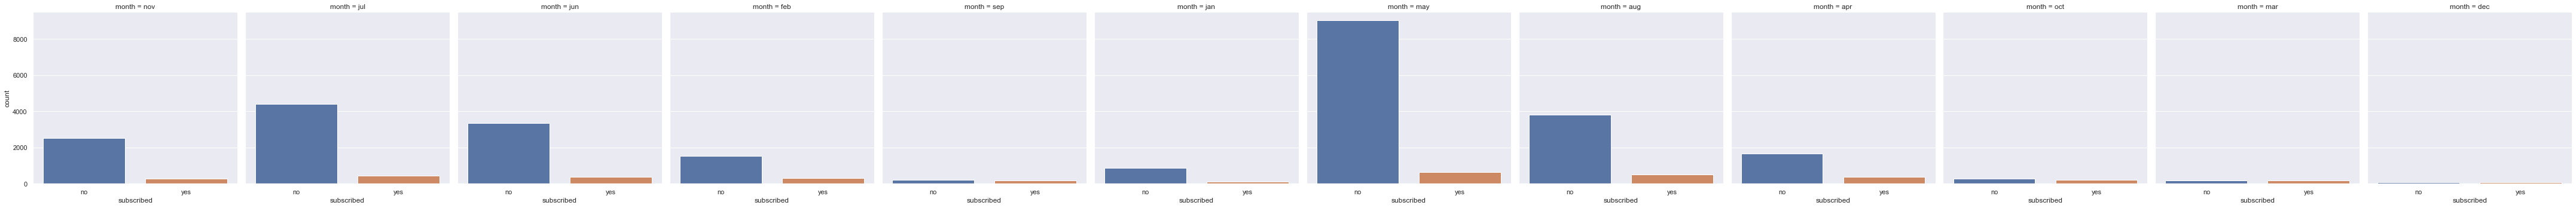

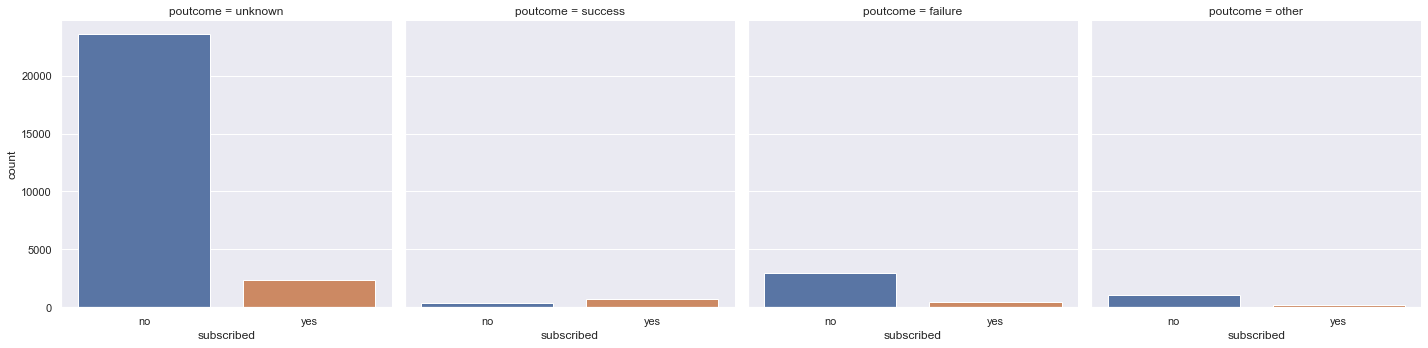

In [163]:
plt.figure(figsize=(20,20))
for feature in cg_features:
    sns.set()
    sns.catplot( x='subscribed', col=feature,kind='count', data=train_obj)
    
plt.show()

## Numerial features

In [10]:
train_num = train.select_dtypes(exclude='object')
train_num

,ID,age,balance,day,duration,campaign,pdays,previous
0,26110,56,1933,19,44,2,-1,0
1,40576,31,3,20,91,2,-1,0
2,15320,27,891,18,240,1,-1,0
3,43962,57,3287,22,867,1,84,3
4,29842,31,119,4,380,1,-1,0
...,...,...,...,...,...,...,...,...
31642,36483,29,0,12,116,2,-1,0
31643,40178,53,380,5,438,2,-1,0
31644,19710,32,312,7,37,3,-1,0
31645,38556,57,225,15,22,7,337,12


In [11]:
num_features = [col for col in train_num.columns if (col not in ['ID'])]
print(num_features)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

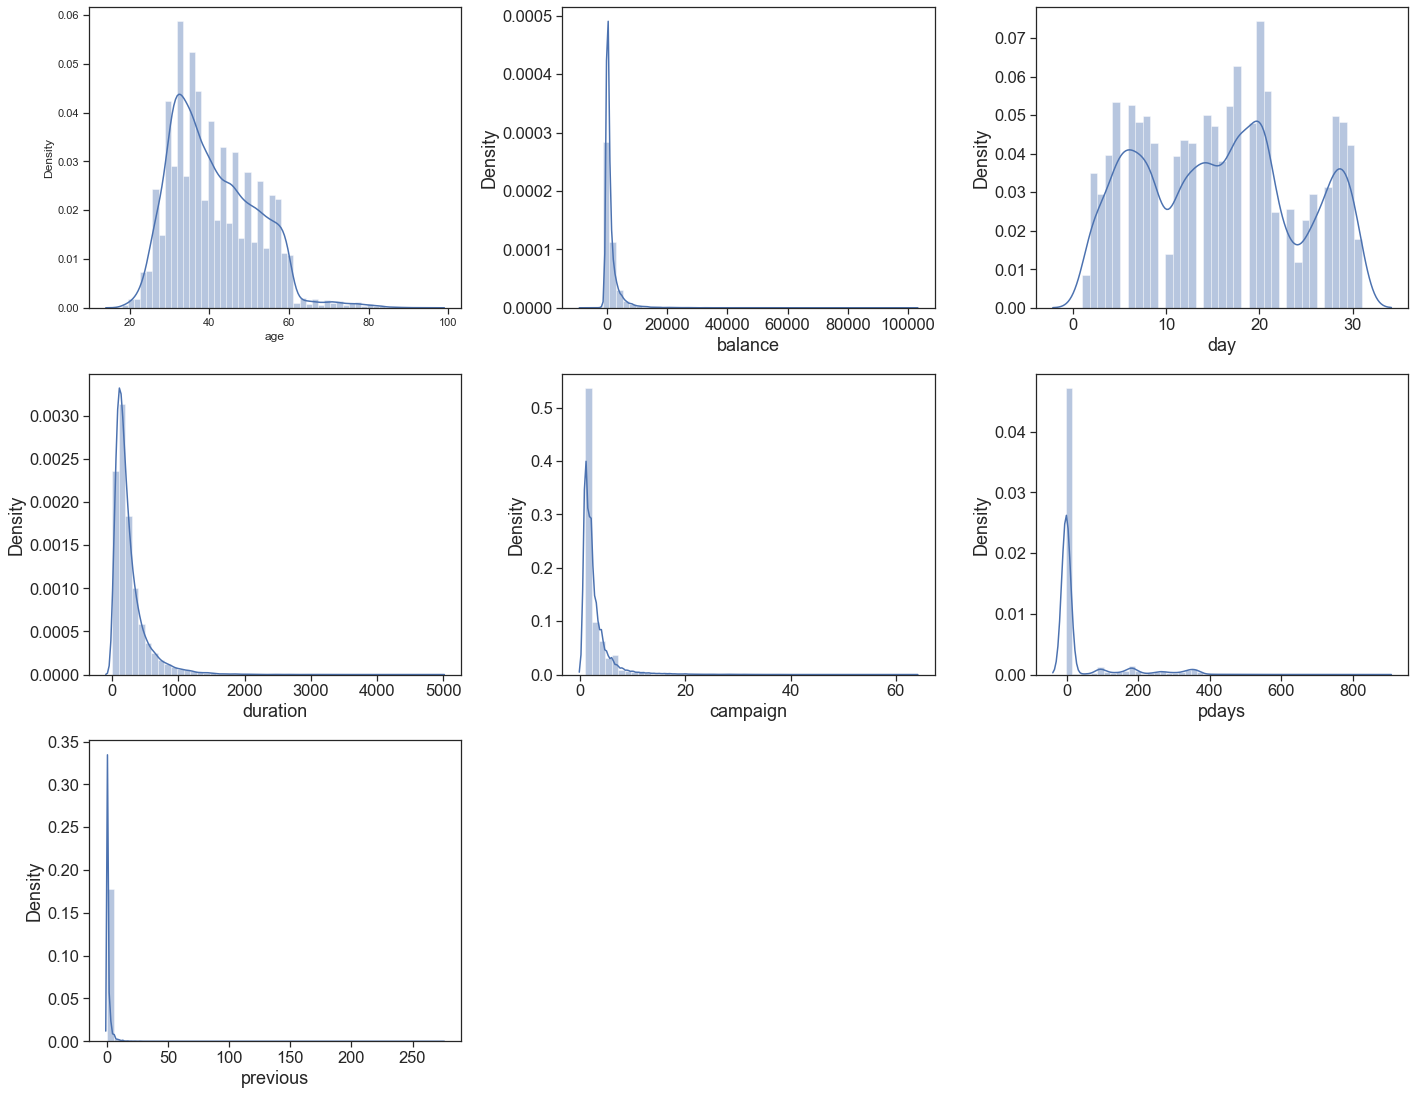

In [65]:
plt.figure(figsize=(20,20))
plotnum = 1
for feature in num_features:
    ax = plt.subplot(4,3,plotnum)
    sns.distplot(train[feature])
    sns.set(context='notebook', style='ticks', font_scale=1.5)
    plt.xlabel(feature)
    plotnum += 1
plt.tight_layout()

#### Visualizing the relationship between all numerical features using Heatmap

<AxesSubplot:>

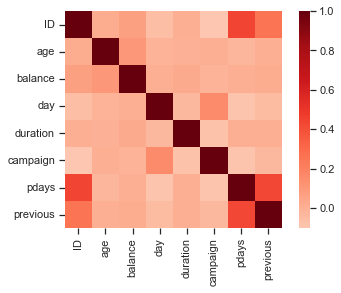

In [150]:
matrix = train.corr()
sns.heatmap(matrix, square=True, cmap="Reds",center=0.3)

## Cleaning data

In [283]:
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

In [284]:
train['default'].value_counts(normalize=True) #remove 'default'

no     0.981515
yes    0.018485
Name: default, dtype: float64

In [352]:
train.drop(['ID', 'default'], axis=1,inplace=True)

In [286]:
train['pdays'].value_counts(normalize=True) #remove 'pdays'

-1      0.819161
 182    0.003729
 92     0.003160
 91     0.002749
 183    0.002686
          ...   
 51     0.000032
 20     0.000032
 25     0.000032
 526    0.000032
 382    0.000032
Name: pdays, Length: 509, dtype: float64

In [353]:
train.drop(['pdays'],axis=1,inplace=True)
train

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed
0,56,admin.,married,unknown,1933,no,no,telephone,19,nov,44,2,0,unknown,no
1,31,unknown,married,secondary,3,no,no,cellular,20,jul,91,2,0,unknown,no
2,27,services,married,secondary,891,yes,no,cellular,18,jul,240,1,0,unknown,no
3,57,management,divorced,tertiary,3287,no,no,cellular,22,jun,867,1,3,success,yes
4,31,technician,married,secondary,119,yes,no,cellular,4,feb,380,1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,0,yes,no,cellular,12,may,116,2,0,unknown,no
31643,53,management,divorced,tertiary,380,no,yes,cellular,5,jun,438,2,0,unknown,yes
31644,32,management,single,tertiary,312,no,no,cellular,7,aug,37,3,0,unknown,no
31645,57,technician,married,secondary,225,yes,no,telephone,15,may,22,7,12,failure,no


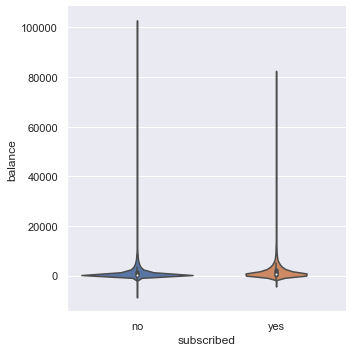

In [288]:
sns.catplot(x='subscribed',y='balance',data=train,kind='violin')

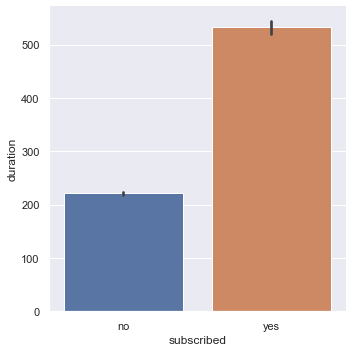

In [210]:
sns.catplot(x='subscribed',y='duration',data=train,kind='bar')

In [289]:
train.groupby(['subscribed','campaign'],sort=True).size()

subscribed  campaign
no          1           10486
            2            7792
            3            3439
            4            2213
            5            1147
                        ...  
yes         16              2
            17              6
            20              1
            24              1
            32              1
Length: 65, dtype: int64

In [354]:
cate_columns = ['job','marital','education','contact','month','poutcome']
bool_columns=['housing','loan','subscribed']

In [355]:
from sklearn.preprocessing import LabelEncoder

label_encoder_dict = {}
for col in cate_columns:
    label_encoder_temp = LabelEncoder()
    train[col] = label_encoder_temp.fit_transform(train[col])
    unique_list = train[col].unique()
    unique_list.sort()
    
    unique_dict = {}
    for v in unique_list:
        unique_dict[v] = label_encoder_temp.inverse_transform(np.array([v]))[0]
    
    label_encoder_dict[col] = unique_dict

In [356]:
for key, value in label_encoder_dict.items():
    print(key, value)

job {0: 'admin.', 1: 'blue-collar', 2: 'entrepreneur', 3: 'housemaid', 4: 'management', 5: 'retired', 6: 'self-employed', 7: 'services', 8: 'student', 9: 'technician', 10: 'unemployed', 11: 'unknown'}
marital {0: 'divorced', 1: 'married', 2: 'single'}
education {0: 'primary', 1: 'secondary', 2: 'tertiary', 3: 'unknown'}
contact {0: 'cellular', 1: 'telephone', 2: 'unknown'}
month {0: 'apr', 1: 'aug', 2: 'dec', 3: 'feb', 4: 'jan', 5: 'jul', 6: 'jun', 7: 'mar', 8: 'may', 9: 'nov', 10: 'oct', 11: 'sep'}
poutcome {0: 'failure', 1: 'other', 2: 'success', 3: 'unknown'}


In [347]:
print(bool_columns)

['housing', 'loan']


In [357]:
for col in bool_columns:
    train[col+'_new'] = train[col].apply(lambda x : 1 if x=='yes' else 0)
    train.drop(col,axis=1,inplace=True)

In [300]:
train

,age,job,marital,education,balance,contact,day,month,duration,campaign,previous,poutcome,housing_new,loan_new,subscribed_new
0,56,0,1,3,1933,1,19,9,44,2,0,3,0,0,0
1,31,11,1,1,3,0,20,5,91,2,0,3,0,0,0
2,27,7,1,1,891,0,18,5,240,1,0,3,1,0,0
3,57,4,0,2,3287,0,22,6,867,1,3,2,0,0,1
4,31,9,1,1,119,0,4,3,380,1,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,12,8,116,2,0,3,1,0,0
31643,53,4,0,2,380,0,5,6,438,2,0,3,0,1,1
31644,32,4,2,2,312,0,7,1,37,3,0,3,0,0,0
31645,57,9,1,1,225,1,15,8,22,7,12,0,1,0,0


## Splitting the dataset

In [336]:
X = train.drop(['subscribed_new'],axis=1)
y = train['subscribed_new']

In [337]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True)

In [338]:
print("The size of X_train is ", X_train.shape)
print("The size of X_test is ", X_test.shape)
print("The size of y_train is ", y_train.shape)
print("The size of y_test is ", y_test.shape)

The size of X_train is  (25317, 14)
The size of X_test is  (6330, 14)
The size of y_train is  (25317,)
The size of y_test is  (6330,)


## Model selection

In [316]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
from sklearn import metrics

lg = LogisticRegression()
lg.fit(X_train, y_train)
print(lg.coef_)

[[-1.38096935e-02 -6.39769302e-03 -1.38474325e-01  3.31473978e-03
   3.32860078e-05 -3.81964102e-01 -1.52683386e-02 -3.12505283e-02
   3.65913853e-03 -3.49206702e-01  8.31211699e-03 -3.35206849e-01
  -3.75986251e-01 -1.20906432e-01]]


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [310]:
y_predict = lg.predict(X_test)
print("准确率：", lg.score(X_test, y_test))

准确率： 0.8848341232227488


In [405]:
RFC_score = cross_val_score(estimator=RandomForestClassifier(),
                            X=X_train,y=y_train, cv=5,scoring='accuracy' )
print(RFC_score)

[0.90165877 0.90343602 0.90499704 0.90183686 0.90124432]


In [406]:
print(RFC_score.mean())

0.9026346002454382


## Submission

In [392]:
test=pd.read_csv('C:/Users/qqcom/Downloads/term_deposit_prediction/test.csv')
test_original = test.copy()

In [384]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [393]:
test.drop(['ID','default','pdays'],axis=1,inplace=True)
print(test)

       age            job   marital  education  balance housing loan  \
0       32       services   married  secondary      118     yes   no   
1       78        retired  divorced    primary     2787      no   no   
2       31  self-employed    single   tertiary      144     yes   no   
3       57       services    single    primary     3777     yes   no   
4       45    blue-collar  divorced  secondary     -705      no  yes   
...    ...            ...       ...        ...      ...     ...  ...   
13559   39     management   married   tertiary       45      no   no   
13560   54    blue-collar   married    primary     2281     yes   no   
13561   35        retired   married    primary      285     yes   no   
13562   29         admin.    single  secondary      464      no   no   
13563   29         admin.   married  secondary        2     yes   no   

         contact  day month  duration  campaign  previous poutcome  
0       cellular   15   may        20         6         0  unknown

In [394]:
cate_columns = ['job','marital','education','contact','month','poutcome']
bool_columns=['housing','loan']

from sklearn.preprocessing import LabelEncoder

label_encoder_dict = {}
for col in cate_columns:
    label_encoder_temp = LabelEncoder()
    test[col] = label_encoder_temp.fit_transform(test[col])
    unique_list = test[col].unique()
    unique_list.sort()
    
    unique_dict = {}
    for v in unique_list:
        unique_dict[v] = label_encoder_temp.inverse_transform(np.array([v]))[0]
    
    label_encoder_dict[col] = unique_dict
    
for key, value in label_encoder_dict.items():
    print(key, value)

job {0: 'admin.', 1: 'blue-collar', 2: 'entrepreneur', 3: 'housemaid', 4: 'management', 5: 'retired', 6: 'self-employed', 7: 'services', 8: 'student', 9: 'technician', 10: 'unemployed', 11: 'unknown'}
marital {0: 'divorced', 1: 'married', 2: 'single'}
education {0: 'primary', 1: 'secondary', 2: 'tertiary', 3: 'unknown'}
contact {0: 'cellular', 1: 'telephone', 2: 'unknown'}
month {0: 'apr', 1: 'aug', 2: 'dec', 3: 'feb', 4: 'jan', 5: 'jul', 6: 'jun', 7: 'mar', 8: 'may', 9: 'nov', 10: 'oct', 11: 'sep'}
poutcome {0: 'failure', 1: 'other', 2: 'success', 3: 'unknown'}


In [395]:
print(test)

       age  job  marital  education  balance housing loan  contact  day  \
0       32    7        1          1      118     yes   no        0   15   
1       78    5        0          0     2787      no   no        1    1   
2       31    6        2          2      144     yes   no        2   16   
3       57    7        2          0     3777     yes   no        1   13   
4       45    1        0          1     -705      no  yes        2    3   
...    ...  ...      ...        ...      ...     ...  ...      ...  ...   
13559   39    4        1          2       45      no   no        0   28   
13560   54    1        1          0     2281     yes   no        2   20   
13561   35    5        1          0      285     yes   no        0   29   
13562   29    0        2          1      464      no   no        0    9   
13563   29    0        1          1        2     yes   no        0    6   

       month  duration  campaign  previous  poutcome  
0          8        20         6         0  

In [396]:
for col in bool_columns:
    test[col+'_new'] = test[col].apply(lambda x : 1 if x=='yes' else 0)
    test.drop(col,axis=1,inplace=True)

In [397]:
print(test)

       age  job  marital  education  balance  contact  day  month  duration  \
0       32    7        1          1      118        0   15      8        20   
1       78    5        0          0     2787        1    1      5       372   
2       31    6        2          2      144        2   16      8       676   
3       57    7        2          0     3777        1   13      8        65   
4       45    1        0          1     -705        2    3      5       111   
...    ...  ...      ...        ...      ...      ...  ...    ...       ...   
13559   39    4        1          2       45        0   28      1       148   
13560   54    1        1          0     2281        2   20      6       158   
13561   35    5        1          0      285        0   29      4       136   
13562   29    0        2          1      464        0    9      9       208   
13563   29    0        1          1        2        0    6      8       339   

       campaign  previous  poutcome  housing_new  l

In [398]:
pred_test = lg.predict(test)
print(pred_test)

[0 0 0 ... 0 0 0]


In [399]:
submission = pd.DataFrame(pred_test,columns = ['subscribed'] )
submission = pd.concat([test_original['ID'], submission], axis = 1)
print(submission)

          ID  subscribed
0      38441           0
1      40403           0
2       3709           0
3      37422           0
4      12527           0
...      ...         ...
13559  23465           0
13560  11743           0
13561  28292           0
13562  45163           0
13563  34839           0

[13564 rows x 2 columns]


In [404]:
submission.to_csv('C:/Users/qqcom/Downloads/term_deposit_prediction/submission.csv')

In [401]:
submission['subscribed'].value_counts()

0    13055
1      509
Name: subscribed, dtype: int64

In [402]:
submission['subscribed'].value_counts(normalize=True)

0    0.962474
1    0.037526
Name: subscribed, dtype: float64